In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fffd373b2f32dc92a5ab3864bf51631b


In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tabuk
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | antigonish
Processing Record 4 of Set 1 | ouallam
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | vrangel
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | mishkino
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | shimoda
Processing Record 22 of Set 1 | ilulissat
Processing Record 23 of S

In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [24]:
from citipy import citipy

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [35]:
len(city_data)

555

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tabuk,17.4189,121.4443,72.84,95,100,5.68,PH,2022-04-04 00:58:03
1,Avarua,-21.2078,-159.7750,75.25,88,75,19.57,CK,2022-04-04 00:58:03
2,Antigonish,45.6169,-61.9986,31.82,86,98,1.99,CA,2022-04-04 00:56:28
3,Ouallam,14.3188,2.0866,83.86,8,100,4.00,NE,2022-04-04 00:58:04
4,Tuktoyaktuk,69.4541,-133.0374,-18.40,76,20,4.61,CA,2022-04-04 00:54:23
5,Cape Town,-33.9258,18.4232,60.12,80,20,8.05,ZA,2022-04-04 00:56:30
6,Rikitea,-23.1203,-134.9692,77.43,65,100,9.60,PF,2022-04-04 00:56:30
7,Mahebourg,-20.4081,57.7000,79.25,83,75,10.36,MU,2022-04-04 00:56:30
8,Vrangel,42.7297,133.0839,42.26,85,6,3.24,RU,2022-04-04 00:56:30
9,Vila Franca Do Campo,37.7167,-25.4333,57.61,73,46,13.67,PT,2022-04-04 00:56:31


In [40]:
 new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
 city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tabuk,PH,2022-04-04 00:58:03,17.4189,121.4443,72.84,95,100,5.68
1,Avarua,CK,2022-04-04 00:58:03,-21.2078,-159.7750,75.25,88,75,19.57
2,Antigonish,CA,2022-04-04 00:56:28,45.6169,-61.9986,31.82,86,98,1.99
3,Ouallam,NE,2022-04-04 00:58:04,14.3188,2.0866,83.86,8,100,4.00
4,Tuktoyaktuk,CA,2022-04-04 00:54:23,69.4541,-133.0374,-18.40,76,20,4.61


In [44]:
# Create the output file (CSV).
output_data_file = "/Users/bryonlhobbs/Desktop/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

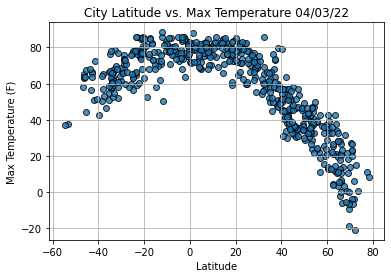

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

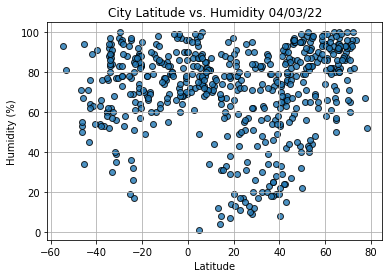

In [47]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

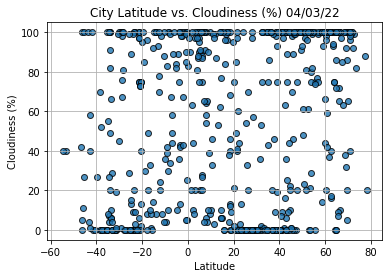

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

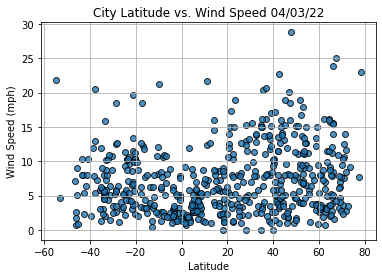

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()